In [24]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree, KNeighborsClassifier
from sklearn.datasets import make_classification, make_regression, load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
import time
import pandas as pd

In [25]:
# zad 2.1-2.3
class knn:
    def __init__(self, n_neighbors=1, use_KDTree=False, mode='classification'):
        self.n_neighbors = n_neighbors
        self.use_KDTree = use_KDTree
        self.KDTree = None
        self.mode = mode
    
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        if self.use_KDTree:
            self.KDTree = KDTree(self.X)

    def predict(self, X_test):
        self.decisions = []
        X_test = np.array(X_test)
        if self.use_KDTree:
            _, ind = self.KDTree.query(X_test, k=self.n_neighbors)
        else:
            # find the indices of the nearest (with the smallest distance) k points for each point
            ind = [np.argsort(np.sqrt(((self.X - x)**2).sum(axis=1)))[:self.n_neighbors] for x in X_test]  
        if self.mode == 'classification':
            for neighbors_idx in ind:
                nearest_labels = self.y[neighbors_idx] 
                unique_labels, counts = np.unique(nearest_labels, return_counts=True) # counts of unique labels
                most_common = unique_labels[counts.argmax()] # the label with the highest counts
                self.decisions.append(most_common)
        elif self.mode == 'regression':
            for neighbors_idx in ind:
                nearest_values = self.X[neighbors_idx] # the values of neighbors
                average_value = np.mean(nearest_values, axis=0)
                self.decisions.append(average_value)
            # for x in X_test:
            #     distances = np.sqrt(((self.X - x)**2).sum(axis=1)) # calculate distances to all points
            #     nearest_indices = np.argsort(distances)[:self.n_neighbors] # find indices of least distance
            #     nearest_labels = self.y[nearest_indices]
            #     unique_labels, counts = np.unique(nearest_labels, return_counts=True) # counts of labels
            #     most_common = unique_labels[counts.argmax()] # most common label
            #     self.decisions.append(most_common)
        return np.array(self.decisions)

    def score(self, X_test, y_test):
        X_test = np.array(X_test)
        y_test = np.array(y_test)
        predictions = self.predict(X_test)
        if self.mode == 'classification':
            hits = np.sum(predictions == y_test)
            number_of_predictions = len(y_test)
            return hits / number_of_predictions
        elif self.mode == 'regression':
            mse = np.mean((X_test - predictions)**2) # mean squared error
            return mse

In [42]:
# zad 3.1
X, y = make_classification(
    n_samples = 100,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_repeated = 0,
    random_state = 3
)
# zad 3.2
knn_random = knn(5, True)
knn_random.fit(X, y)

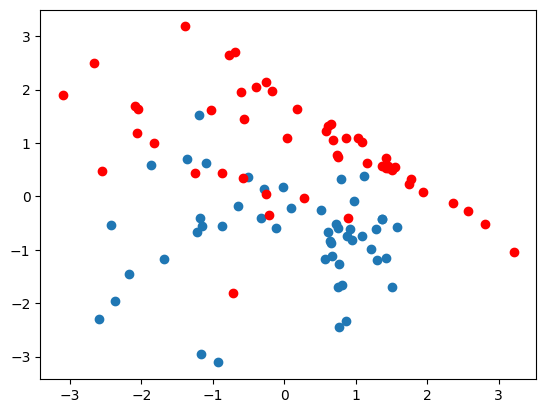

In [43]:
plt.plot(X[:,0][y == 0], X[:, 1][y == 0], 'o')
plt.plot(X[:,0][y == 1], X[:, 1][y == 1], 'ro')
plt.show()

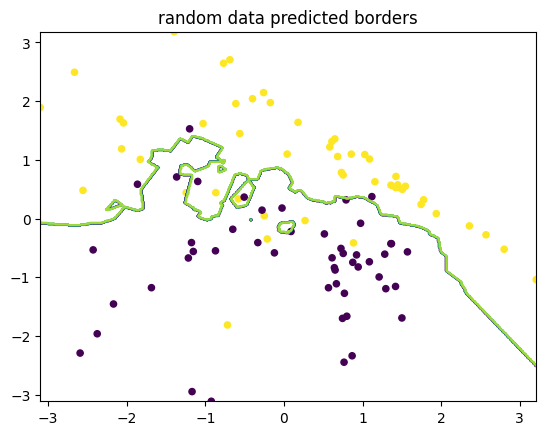

In [44]:
# zad 3.3
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = knn_random.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20)
plt.contour(xx, yy, Z)
plt.title('random data predicted borders')
plt.show()

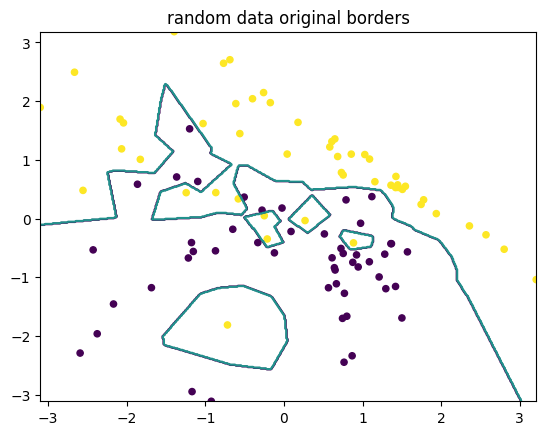

In [45]:
# zad 3.3
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
from scipy.interpolate import griddata
Z = griddata(X, y, (xx, yy), method='nearest')
plt.scatter(X[:, 0], X[:, 1], c=y, s=20)
plt.contour(xx, yy, Z, levels=1)
plt.title('random data original borders')
plt.show()

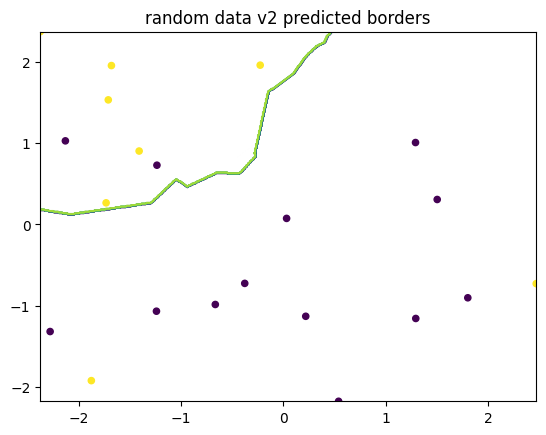

In [46]:
# zbior testowy
X_value_samples = 21
X_value1 = np.array([[np.random.uniform(np.min(X[:,0])*0.8, np.max(X[:, 0])*0.8)] for x in range(X_value_samples)])
X_value2 = np.array([[np.random.uniform(np.min(X[:,1])*0.8, np.max(X[:, 1])*0.8)] for x in range(X_value_samples)])
X_value = np.hstack((X_value1, X_value2))
y_value = np.random.randint(0, 2, X_value_samples)
x_min, x_max = X_value[:, 0].min(), X_value[:, 0].max()
y_min, y_max = X_value[:, 1].min(), X_value[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
knn_random.fit(X_value, y_value)
Z = knn_random.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X_value[:, 0], X_value[:, 1], c=y_value, s=20)
plt.contour(xx, yy, Z)
plt.title('random data v2 predicted borders')
plt.show()

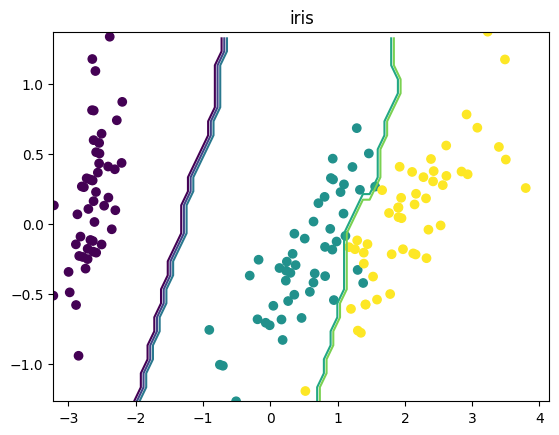

In [8]:
# zad 3.4
iris = load_iris()
X_train = iris.data
y_train = iris.target
knn_iris = knn(5, True)
knn_iris.fit(X_train, y_train)
knn_iris.score(X_train, y_train)
# zad 3.5
# a
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
grid_2d = np.c_[xx.ravel(), yy.ravel()]
# b
grid_4d = pca.inverse_transform(grid_2d)
Z = knn_iris.predict(grid_4d)
# c
Z = Z.reshape(xx.shape)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.contour(xx, yy, Z, levels=4) 
plt.title('iris')
plt.ylim(y_min, y_max)
plt.show()

In [37]:
# zad 3.6
X, y = make_classification(
    n_samples = 100,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_repeated = 0,
    random_state = 3
)
k_neighbors = range(1, 21)
n_splits = len(X)
test_size = int(len(X) / n_splits)
for i in k_neighbors:
    knn_accuracy_test = knn(i, True, 'classification')
    scores = []
    for j in range(n_splits):
        X_train = np.concatenate([X[j+test_size:], X[:j]])
        y_train = np.concatenate([y[j+test_size:], y[:j]])
        X_test = X[j:j+test_size]
        y_test = y[j:j+test_size]
        knn_accuracy_test.fit(X_train, y_train)
        score = knn_accuracy_test.score(X_test, y_test)
        scores.append(score)
    print('liczba sąsiedzi', i) 
    print(f'średnia dokładność: {np.mean(scores):.3f}')

liczba sąsiedzi 1
średnia dokładność: 0.800
liczba sąsiedzi 2
średnia dokładność: 0.850
liczba sąsiedzi 3
średnia dokładność: 0.830
liczba sąsiedzi 4
średnia dokładność: 0.850
liczba sąsiedzi 5
średnia dokładność: 0.840
liczba sąsiedzi 6
średnia dokładność: 0.870
liczba sąsiedzi 7
średnia dokładność: 0.850
liczba sąsiedzi 8
średnia dokładność: 0.850
liczba sąsiedzi 9
średnia dokładność: 0.850
liczba sąsiedzi 10
średnia dokładność: 0.860
liczba sąsiedzi 11
średnia dokładność: 0.860
liczba sąsiedzi 12
średnia dokładność: 0.860
liczba sąsiedzi 13
średnia dokładność: 0.840
liczba sąsiedzi 14
średnia dokładność: 0.850
liczba sąsiedzi 15
średnia dokładność: 0.840
liczba sąsiedzi 16
średnia dokładność: 0.850
liczba sąsiedzi 17
średnia dokładność: 0.850
liczba sąsiedzi 18
średnia dokładność: 0.860
liczba sąsiedzi 19
średnia dokładność: 0.860
liczba sąsiedzi 20
średnia dokładność: 0.860


In [38]:
# zad 3.7
X, y = make_classification(
    n_samples = 5000,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_repeated = 0,
    random_state = 3
)
knn_kdtree = knn(5, True)
knn_nokdtree = knn(5)
knn_kdtree.fit(X, y)
start_time = time.time()
_ = knn_kdtree.predict(X)
kdtree_time = time.time() - start_time
knn_nokdtree.fit(X, y)
start_time = time.time()
_ = knn_nokdtree.predict(X)
nokdtree_time = time.time() - start_time

print("czas z KD-Tree: {:.4f} sekund".format(kdtree_time))
print("cza bez KD-Tree: {:.4f} sekund".format(nokdtree_time))

czas z KD-Tree: 0.0853 sekund
cza bez KD-Tree: 2.1963 sekund


mean square error =  0.01575501672483274


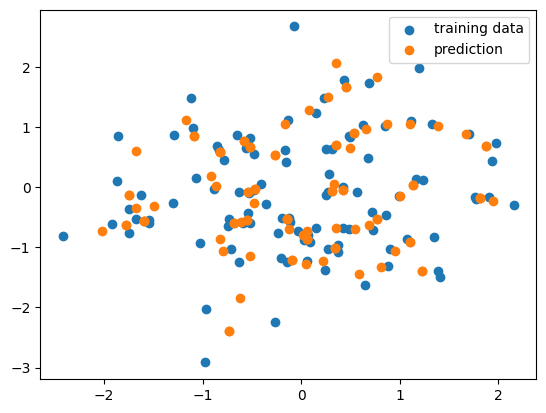

In [57]:
# zad 4.1
X, y = make_regression(
    n_samples = 100,
    n_features = 2,
    n_informative = 2,
    random_state = 3
)
# zad 4.2
knn4 = knn(3, mode='regression')
knn4.fit(X, y)
print('mean square error = ', knn4.score(X, y))
X_predicted = knn4.predict(X)
# zad 4.3
plt.scatter(X[:, 0], X[:, 1], label='training data')
plt.scatter(X_predicted[:, 0], X_predicted[:, 1], label='prediction')
plt.legend()
plt.show()

In [40]:
# import os, ssl 
# if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):      
#     ssl._create_default_https_context = ssl._create_unverified_context
# zad 4.4
housing = fetch_california_housing()
X, y = housing.data, housing.target

k_neighbors = 5
n_splits = 10
test_size = int(len(X) / n_splits)
for i in range(k_neighbors):
    knn_mse_test = knn(i + 1, True, 'regression')
    mses = []
    for j in range(n_splits):
        X_train = np.concatenate([X[j+test_size:], X[:j]])
        y_train = np.concatenate([y[j+test_size:], y[:j]])
        X_test = X[j:j+test_size]
        y_test = y[j:j+test_size]
        knn_mse_test.fit(X_train, y_train)
        mse = knn_mse_test.score(X_test, y_test)
        # print(mse)
        mses.append(mse)
    print('iteracja nr ', i) 
    print(f'średni błąd dopasowania: {np.mean(mses):.3f}')

iteracja nr  0
średni błąd dopasowania: 3.413
iteracja nr  1
średni błąd dopasowania: 3.425
iteracja nr  2
średni błąd dopasowania: 3.119
iteracja nr  3
średni błąd dopasowania: 3.073
iteracja nr  4
średni błąd dopasowania: 3.639
